In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-ham-dataset/spam_dataset.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/spam-ham-dataset/spam_dataset.csv")
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

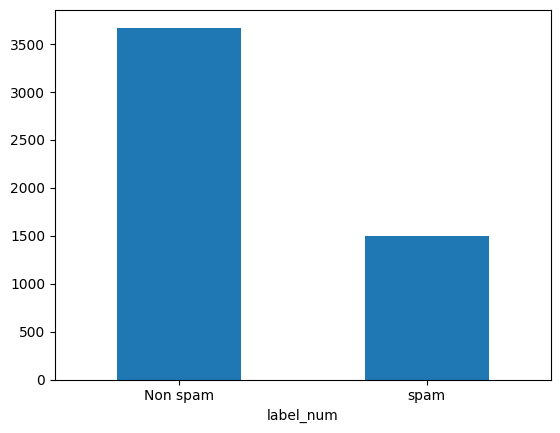

In [7]:
Vis = data['label_num'].value_counts()
Vis.plot(kind="bar")
plt.xticks(np.arange(2),("Non spam","spam"),rotation=0)
plt.show()

In [8]:
data.loc[data['label'] == 'spam', 'Category',] = 0
data.loc[data['label'] == 'ham', 'Category',] = 1

In [9]:
x = data['text']
y = data['label']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [11]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5171,)
(4136,)
(1035,)


In [12]:
#transform the text data to feature vectors that can be used to the logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words ='english', lowercase =True)
x_train_transformed = feature_extraction.fit_transform(x_train)
x_test_transformed = feature_extraction.transform(x_test)

In [13]:
model = LogisticRegression()

In [14]:
model.fit(x_train_transformed, y_train)

LogisticRegression()

In [15]:
prediction_test = model.predict(x_test_transformed)
acc_test = accuracy_score(y_test, prediction_test)

In [16]:
print("Accuracy on test data : ", acc_test*100)

Accuracy on test data :  98.06763285024155
